## Arboles de Decision

### Forma Manual

- Como determinar si se tarta de un perro o un Gato en base a las variables:
    - Altura (cm)
    - Peso (kg)
    - Temperatura (C)

* Datos de prueba:
* Altura  Peso    Temperatura Designacion
    * 13      0.6     40          Gato
    * 22      0.6     41          Gato
    * 35      1.2     37          Perro
    * 25      0.8     38          Gato
    * 33      0.9     40          Perro

Algoritmo: `DesicionTreeClassifier`
Libreria: `sklear` 

In [530]:
# Importamos las librerias
from sklearn.tree import DecisionTreeClassifier

In [531]:

# Cargar los datos
features =[ [13,0.6,40],[22,0.6,41],[35,1.2,37],[25,0.8,38],
            [33,0.9,40],[18,0.8,35],[21,0.9,37],[30,1.3,36],
            [17,0.6,36],[35,1.3,40],[28,1.0,39],[15,0.9,38]
            ]



# El algoritmo solo trabaja con valores numericos
# Gato = 0    Perro = 1
labels = [0,0,1,0,1,0,1,1,0,1,1,0]

In [532]:
# Seleccionamos el modelo
clasificador = DecisionTreeClassifier()

# Entrenar el algoritmo (Aprende)
clasificador.fit(features,labels) #? Var. Independientes    Var. dependiente

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [533]:
# pred = clasificar.predict([28,1.0,39])
pred = clasificador.predict([[22,0.6,41]])
print(pred)

_ = bool(pred)
("Gato","Perro")[_]

[0]


'Gato'

## Dataset `Diagnostico.csv`
* Para predecir la enfermedad (`Faringits, Resfriado, Alergia`)que tiene un paciente en funcion de:
    - Dolor de garganta
    - Fiebre
    - Glandulas inflamadas
    - Congestion
    - Dolor de cabeza

In [534]:
# Importar la slibrerias
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [535]:
# Leer datos del archivo
datos = pd.read_csv("../MyPython//diagnostico.csv")
datos.head()

,Patient ID,Sore throat,Fever,Swollen Glands,Congestion,Headache,Diagnosis
0,1,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,2,No,No,No,Yes,Yes,Allergy
2,3,Yes,Yes,No,Yes,No,Cold
3,4,Yes,No,Yes,No,No,Strep thoat
4,5,No,Yes,No,Yes,No,Cold


Elimino la columan de `Paciente ID` no me sirve para el analisis 

In [536]:
datos.drop(['Patient ID'], axis=1, inplace=True)
datos.head()

,Sore throat,Fever,Swollen Glands,Congestion,Headache,Diagnosis
0,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,No,No,No,Yes,Yes,Allergy
2,Yes,Yes,No,Yes,No,Cold
3,Yes,No,Yes,No,No,Strep thoat
4,No,Yes,No,Yes,No,Cold


Traducimos los nombres de las `variables` con un diccionario {clave.valor}

In [537]:
datos = datos.rename(columns={
    'Sore throat': 'Dolor_Garganta', 
    'Fever': 'Fiebre',
    'Swollen Glands': 'Ganglios_Inflamados',
    'Congestion': 'Congestion',
    'Headache': 'Dolor_Cabeza',
    'Diagnosis': 'Diagnostico'
})

datos.head()

,Dolor_Garganta,Fiebre,Ganglios_Inflamados,Congestion,Dolor_Cabeza,Diagnostico
0,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,No,No,No,Yes,Yes,Allergy
2,Yes,Yes,No,Yes,No,Cold
3,Yes,No,Yes,No,No,Strep thoat
4,No,Yes,No,Yes,No,Cold


Listas los valores de `Clase` o `Targert`

In [538]:
datos.Diagnostico.unique().tolist()

['Strep thoat', 'Allergy', 'Cold']

`Mapear` los valores de las variables de tipo `Nominal` a `Numerico`

In [539]:
atributos = list(datos.columns)

for atri in atributos:
    if atri != 'Diagnostico':
        datos[atri] = datos[atri].map({"Yes": 1, "No": 0})
    else:
        datos[atri] = datos[atri].map({"Strep thoat": 0, "Allergy": 1, "Cold": 2})

datos.head(10)

,Dolor_Garganta,Fiebre,Ganglios_Inflamados,Congestion,Dolor_Cabeza,Diagnostico
0,1,1,1,1,1,0
1,0,0,0,1,1,1
2,1,1,0,1,0,2
3,1,0,1,0,0,0
4,0,1,0,1,0,2
5,0,0,0,1,0,1
6,0,0,1,0,0,0
7,1,0,0,1,1,1
8,0,1,0,1,1,2
9,1,1,0,1,1,2


Separamos las variables independientes y dependientes

In [540]:
var_independientes = datos.columns[:-1].to_list()
var_independientes
x = datos[var_independientes].values    #! var - independientes
y = datos['Diagnostico']                #! var - dependientes

Seleccionar el modelo de clasificacion y entrenado

In [541]:
clasificar = DecisionTreeClassifier()
clasificar.fit(x, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Prediccion de valores (Perro o un Gato)

In [542]:
clasificar.predict([[0,1,0,0,0]])

array([2])

Generar las `Reglas del arbol de clasificacion`

In [543]:
features = ['Dolor_Garganta', 'Fiebre', 'Ganglios_Inflamados', 'Congestion', 'Dolor_Cabeza']

from sklearn import tree
reglas_arbol = tree.export_text(clasificar, feature_names=features, class_names=['Strep throat', 'Allergy', 'Cold'],
                               show_weights=True, decimals=0)

print (reglas_arbol)

|--- Ganglios_Inflamados <= 0
|   |--- Fiebre <= 0
|   |   |--- weights: [0, 3, 0] class: Allergy
|   |--- Fiebre >  0
|   |   |--- weights: [0, 0, 4] class: Cold
|--- Ganglios_Inflamados >  0
|   |--- weights: [3, 0, 0] class: Strep throat



`Graficamos` el arbol de desicion

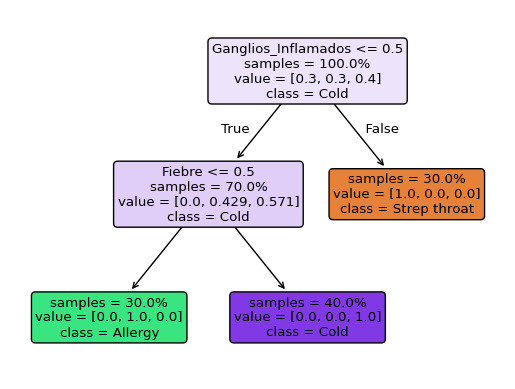

In [544]:
arbol = tree.plot_tree(clasificar, feature_names= features, class_names=['Strep throat', 'Allergy', 'Cold'],
                      filled=True, impurity=False, proportion=True, rounded=True)

## Ejemplo 2: ``Predecir si una persona asistira a un Evento``
Archivo: eventos.xlsx

In [545]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [546]:
#pip install openpyxl

In [547]:
# cargamos los datos
datos = pd.read_excel("../MyPython/dataset/eventos.xlsx")
datos.head()

,Edad,Experiencia,Calificacion,Pais,Asistir
0,36,10,6,Ecuador,Si
1,27,8,7,Colombia,No
2,45,1,8,Argentina,Si
3,18,2,5,Argentina,Si
4,31,4,8,Mexico,Si


In [548]:
datos.Asistir.value_counts()

Asistir
No    8
Si    7
Name: count, dtype: int64

In [549]:
datos.Pais.unique().tolist()

['Ecuador', 'Colombia', 'Argentina', 'Mexico']

In [550]:
d={'Ecuador':0, 'Colombia':1,'Argentina':2, 'Mexico':3 }
datos["Pais"] = datos["Pais"].map(d)
d={'Si':1, 'No':0 }
datos["Asistir"] = datos["Asistir"].map(d)
datos.head()

,Edad,Experiencia,Calificacion,Pais,Asistir
0,36,10,6,0,1
1,27,8,7,1,0
2,45,1,8,2,1
3,18,2,5,2,1
4,31,4,8,3,1


In [551]:
# Separamos las variables
caracteristicas = ["Edad", "Experiencia", "Calificacion", "Pais"]
x = datos[["Edad", "Experiencia", "Calificacion", "Pais"]].values   # todas las filas de esas columnas
y = datos["Asistir"]         # todas las filas de la etiqueta


Aplicamos el modelo 

In [552]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x,y)

Hacemos algunas predicciones

In [553]:
def asiste(x):
    _ = bool(dtree.predict([x]))
    return ("No Asiste","Si Asiste")[_]

# asiste ([36,10,6,0])
# asiste ([27,8,7,1])
asiste ([58,3,5,2])

'Si Asiste'

In [554]:
features = ["Edad", "Experiencia", "Calificacion", "Pais"]
labels = ["No asiste", "Si asiste"]
from sklearn import tree
reglas_arbol = tree.export_text(dtree, feature_names=features, class_names=labels,
                                show_weights=True, decimals=0)
print(reglas_arbol)

|--- Edad <= 21
|   |--- weights: [0, 3] class: Si asiste
|--- Edad >  21
|   |--- Edad <= 30
|   |   |--- weights: [6, 0] class: No asiste
|   |--- Edad >  30
|   |   |--- Experiencia <= 8
|   |   |   |--- weights: [0, 3] class: Si asiste
|   |   |--- Experiencia >  8
|   |   |   |--- Experiencia <= 10
|   |   |   |   |--- weights: [2, 0] class: No asiste
|   |   |   |--- Experiencia >  10
|   |   |   |   |--- weights: [0, 1] class: Si asiste



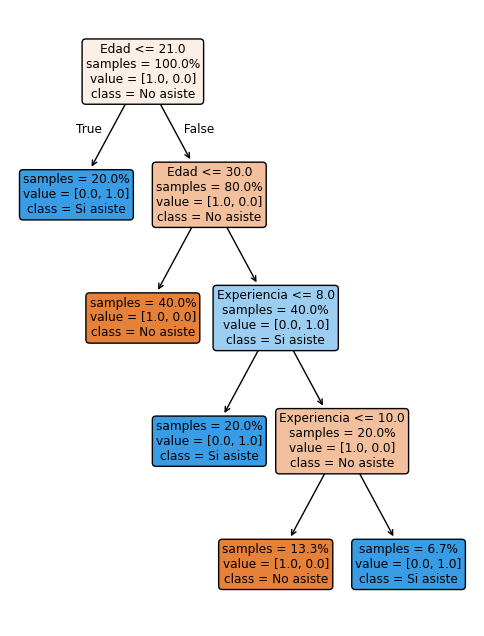

In [555]:
plt.figure(figsize=(6, 8))
arbol = tree.plot_tree(dtree, feature_names= features, class_names=labels,
                      filled=True, impurity=False, proportion=True, rounded=True,
                      precision=0)

Ejemplo 3: Me gusta el CINE?

In [556]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [557]:
# cargamos los datos
datos = pd.read_excel("../MyPython/dataset/Cine.xlsx")
datos

,Popcorn,Soda,Edad,Cine
0,1,1,7,0
1,1,0,12,0
2,0,1,18,1
3,0,1,35,1
4,1,1,38,1
5,1,0,50,0
6,0,0,83,0


In [558]:
# Separamos las variables
caracteristicas = ["Popcorn", "Soda", "Edad"]
x = datos[["Popcorn", "Soda", "Edad"]].values   # todas las filas de esas columnas
y = datos["Cine"]         # todas las filas de la etiqueta

In [559]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x,y)

In [560]:
def Gusta_cine(x):
    _ = bool(dtree.predict([x]))
    return ("No","Si")[_]

Gusta_cine([1,1,38])

'Si'

In [561]:
features = ["Popcorn", "Soda", "Edad"]
labels = ["No le gusta", "Si le gusta"]
from sklearn import tree
reglas_arbol = tree.export_text(dtree, feature_names=features, class_names=labels,
                                show_weights=True, decimals=0)
print(reglas_arbol)

|--- Soda <= 0
|   |--- weights: [3, 0] class: No le gusta
|--- Soda >  0
|   |--- Edad <= 12
|   |   |--- weights: [1, 0] class: No le gusta
|   |--- Edad >  12
|   |   |--- weights: [0, 3] class: Si le gusta



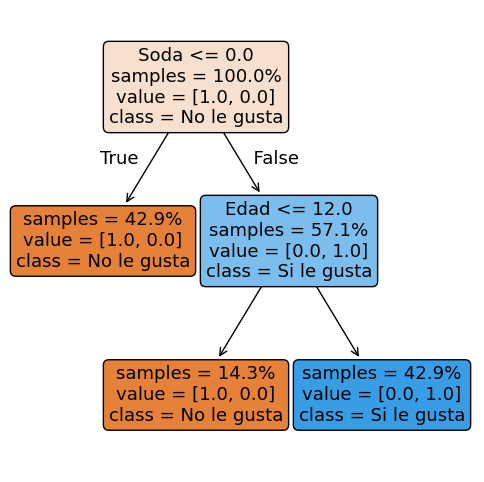

In [562]:
plt.figure(figsize=(6, 6))
arbol = tree.plot_tree(dtree, feature_names= features, class_names=labels,
                      filled=True, impurity=False, proportion=True, rounded=True,
                      precision=0)

## Ejemplo 4: Me gusta el GOLF?

In [563]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [564]:
# cargamos los datos
datos = pd.read_excel("../MyPython/dataset/golf.xlsx")
datos

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,78,False,yes
3,rain,70,96,False,yes
4,rain,68,80,False,yes
5,rain,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rain,75,80,False,yes


In [565]:
# Diccionarios
d = {'sunny':0, 'overcast':1, 'rain':2}
p = {True:1, False:0}   
w = {'no':0, 'yes':1}

# Mapeo
datos["Outlook"] = datos["Outlook"].map(d)
datos["Wind"] = datos["Wind"].map(p)
datos["Play"] = datos["Play"].map(w)

datos.head()

,Outlook,Temperature,Humidity,Wind,Play
0,0,85,85,0,0
1,0,80,90,1,0
2,1,83,78,0,1
3,2,70,96,0,1
4,2,68,80,0,1


In [566]:
caracteristicas = ["Outlook", "Temperature", "Humidity", "Wind"]
X = datos[caracteristicas].values
y = datos["Play"]

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

def JuegaGolf(x):
    _ = int(dtree.predict([x])[0])  
    return ("No juega", "Si juega")[_]


JuegaGolf([2, 65, 70, 1])

'No juega'

In [567]:
#Generar las reglas
caracteristicas = ["Outlook", "Temperature", "Humidity", "Wind"]
labels = ["No juega","Si juega"]
from sklearn import tree
reglas_arbol = tree.export_text(dtree, feature_names=caracteristicas, class_names=labels,
                                show_weights=True, decimals=0)
print(reglas_arbol)

|--- Outlook <= 0
|   |--- Humidity <= 78
|   |   |--- weights: [0, 2] class: Si juega
|   |--- Humidity >  78
|   |   |--- weights: [3, 0] class: No juega
|--- Outlook >  0
|   |--- Wind <= 0
|   |   |--- weights: [0, 5] class: Si juega
|   |--- Wind >  0
|   |   |--- Outlook <= 2
|   |   |   |--- weights: [0, 2] class: Si juega
|   |   |--- Outlook >  2
|   |   |   |--- weights: [2, 0] class: No juega



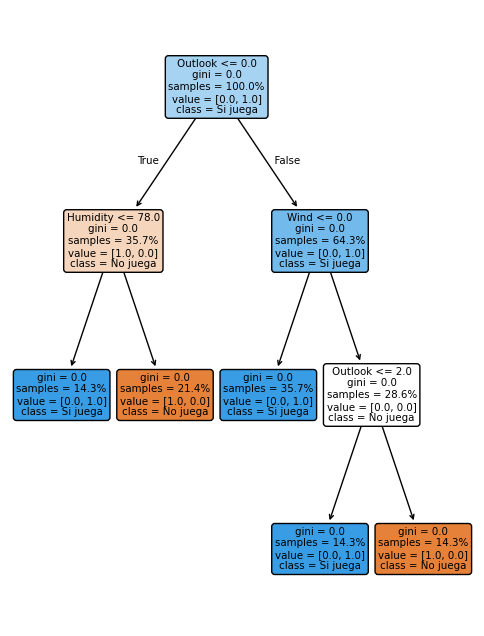

In [568]:
plt.figure(figsize=(6,8))
tree.plot_tree(
    dtree, 
    feature_names=caracteristicas, 
    class_names=labels, 
    filled=True, 
    rounded=True, 
    proportion=True,
    precision=0
)
plt.show()